# Funciones de error personalizadas con Tensorflow

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

## Huber loss

La función de pérdida de Huber describe la pena incurrida por un procedimiento de estimación f. Huber (1964) define la función de pérdida de forma fragmentada por:

$$ {\displaystyle L_{\delta }(y,h(x))={\begin{cases}{\frac {1}{2}}(y-h(x))^{2} \hspace{1.5cm} {\textrm {for}}|y-h(x)|\leq \delta ,\\\delta \,|y-h(x)|-{\frac {1}{2}}\delta ^{2} \hspace{5mm} {\textrm {otherwise.}}\end{cases}}}$$

Más información: https://en.wikipedia.org/wiki/Huber_loss

In [7]:
# Función que genera la función de pérdida de Huber
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

A continuación se representa gráficamente la función de pérdida de Huber en función del threshold seleccionado

In [10]:
# El valor más habitual para la función de pérdida de huber es 1.0
huber_fn = create_huber(1.0)

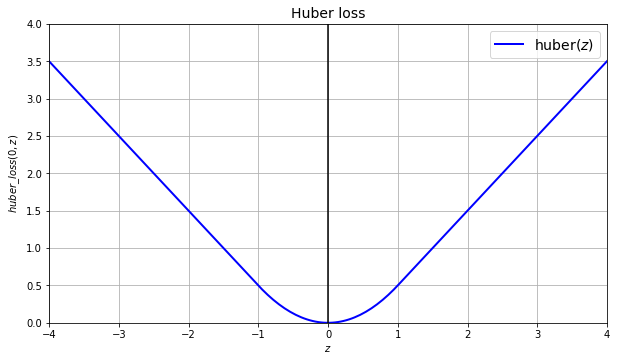

In [11]:
# Representación gráfica de la función de pérdida de Huber
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5.5))

z = np.linspace(-4, 4, 200)

plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")

plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.ylabel("$huber\_loss(0, z)$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

## Entrenando una Red Neuronal Artificial con la nueva función de error

A continuación se pone en práctica la función de error definida en el apartado anterior en un ejercicio práctico. Para ello, se va a utilizar el caso de uso práctico de prediccióndel precio de una vivienda presentado en la sección de introducción a Keras

### Importando el conjunto de datos

In [12]:
from tensorflow.keras import datasets
boston_housing = datasets.boston_housing

In [13]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [14]:
import pandas as pd

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### División del conjunto de datos

In [16]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

### Escalando el conjunto de datos

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_preep = scaler.fit_transform(X_val)
X_test_prep = scaler.fit_transform(X_test)

### Definición de la arquitectura de la Red Neuronal Artificial

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [25]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


### Entrenamos la red neuronal artificial

#### Función de error utilizada en el ejercicio práctico de introducción a Keras

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error __mean_squared_error__ durante el proceso de entrenamiento

In [26]:
network.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae']
)

In [27]:
history = network.fit(
    X_train_prep,
    y_train,
    epochs=50,
    validation_data=(X_val_preep, y_val)
)

Epoch 1/50
13/13 [==============================] - 1s 22ms/step - loss: 540.1432 - mae: 21.1869 - val_loss: 634.7801 - val_mae: 22.7708
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 513.2339 - mae: 20.4423 - val_loss: 614.1540 - val_mae: 22.4439
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 485.0610 - mae: 19.6953 - val_loss: 592.8681 - val_mae: 22.0518
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 455.1276 - mae: 18.9991 - val_loss: 570.7017 - val_mae: 21.5758
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 422.0855 - mae: 18.2189 - val_loss: 547.7747 - val_mae: 20.9973
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 389.1427 - mae: 17.4652 - val_loss: 518.6449 - val_mae: 20.2717
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 354.5233 - mae: 16.6166 - val_loss: 486.2411 - val_mae: 19.4777
Epoch 8/50
13/13 [=============================

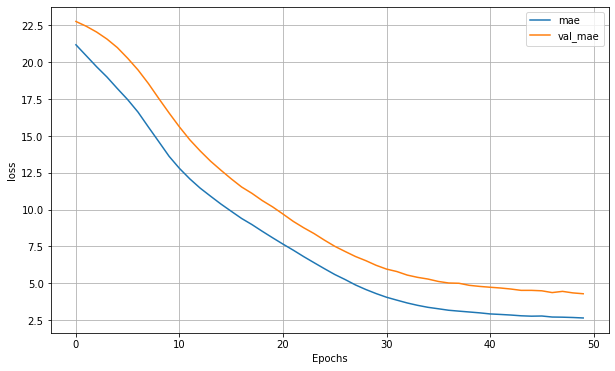

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

#### Evaluación de los resultados

In [30]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1378.1495 - mae: 17.8150


In [31]:
print('test_mae:', test_mae)

test_mae: 17.815038681030273


#### Función de error Huber

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error de huber durante el proceso de entrenamiento.

In [33]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [34]:
network.compile(
    loss=create_huber(1.0),
    optimizer='adam',
    metrics=['mae']
)

In [35]:
history = network.fit(
    X_train_prep,
    y_train,
    epochs=50,
    validation_data=(X_val_preep, y_val)
)

Epoch 1/50
13/13 [==============================] - 1s 13ms/step - loss: 21.2739 - mae: 21.7732 - val_loss: 22.9516 - val_mae: 23.4516
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 20.6794 - mae: 21.1775 - val_loss: 22.7882 - val_mae: 23.2882
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 20.1789 - mae: 20.6757 - val_loss: 22.6266 - val_mae: 23.1266
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 19.8171 - mae: 20.3139 - val_loss: 22.4392 - val_mae: 22.9392
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 19.5141 - mae: 20.0115 - val_loss: 22.2013 - val_mae: 22.7011
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 19.2153 - mae: 19.7113 - val_loss: 21.9172 - val_mae: 22.4109
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 18.8936 - mae: 19.3903 - val_loss: 21.5825 - val_mae: 22.0809
Epoch 8/50
13/13 [==============================] - 0s 3ms/st

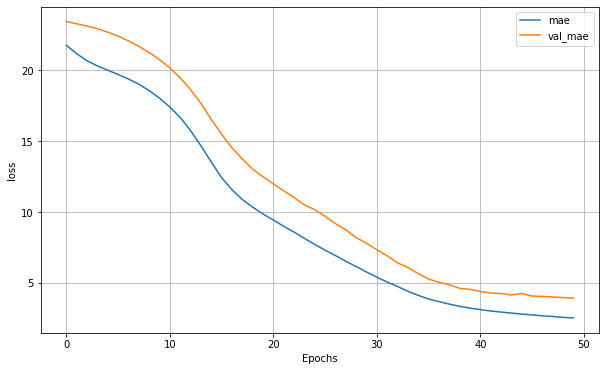

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

#### Evaluación de los resultados

In [37]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 16.2792 - mae: 16.7210


In [38]:
print('test_mae:', test_mae)

test_mae: 16.721006393432617


## Guardando el modelo en disco con objetos personalizados

Cuando nuestro modelo contiene algún componente personalizado, debemos realizar el siguiente procedimiento para almacenar el modelo en disco e importarlo cuando sea necesario

In [39]:
# Guardamos el modelo en disco
network.save('modelo_huber_loss.h5')

In [42]:
# Importamos el modelo previamente guardado en disco
network2 = tf.keras.models.load_model('modelo_huber_loss.h5',
                                     custom_objects={'huber_fn': create_huber(1.0)})

In [43]:
 history = network2.fit(
     X_train_prep,
     y_train,
     epochs=2,
     validation_data=(X_val_preep, y_val)
 )

Epoch 1/2
13/13 [==============================] - 0s 14ms/step - loss: 2.0336 - mae: 2.4850 - val_loss: 3.4560 - val_mae: 3.9061
Epoch 2/2
13/13 [==============================] - 0s 4ms/step - loss: 2.0047 - mae: 2.4556 - val_loss: 3.4247 - val_mae: 3.8754
